<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [20]:
# put your answer here
df = pd.read_excel('/content/data.xlsx')
df.head()

,Name,Posts | Share frequently?,Active?,Replies to messages?,Friends/Followers,Personality
0,Aira,1,1,1,380,1
1,Jomar,0,0,0,140,0
2,Mika,1,1,1,320,1
3,Carlo,0,0,0,90,0
4,Dianne,1,1,1,410,1


Display the summary of all the features of the dataset using `.info()`

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       51 non-null     object
 1   Posts | Share frequently?  51 non-null     int64 
 2   Active?                    51 non-null     int64 
 3   Replies to messages?       51 non-null     int64 
 4   Friends/Followers          51 non-null     int64 
 5   Personality                51 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


Display the total number of samples from each label using `.value_counts()`

In [22]:
df.value_counts()

,,,,,,count
Name,Posts | Share frequently?,Active?,Replies to messages?,Friends/Followers,Personality,
Aira,1,1,1,380,1,1
Arvin,1,1,1,430,1,1
Aubrey,1,1,0,310,0,1
Bryan,0,0,0,120,0,1
Cams,1,1,1,360,1,1
Carlo,0,0,0,90,0,1
Cel,1,1,1,450,1,1
Charm,1,1,0,280,0,1
Daryl,0,0,0,100,0,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

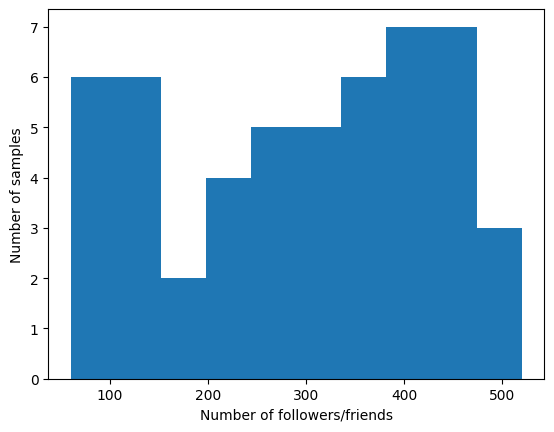

In [11]:
# put your answer here
plt.hist(df['Friends/Followers'])
plt.xlabel('Number of followers/friends')
plt.ylabel('Number of samples')
plt.show

Remove the name column using `drop()` method

In [12]:
# put your answer here
df.drop(columns='Name', inplace=False)

,Posts | Share frequently?,Active?,Replies to messages?,Friends/Followers,Personality
0,1,1,1,380,1
1,0,0,0,140,0
2,1,1,1,320,1
3,0,0,0,90,0
4,1,1,1,410,1
5,1,0,0,280,1
6,0,1,0,190,0
7,1,1,1,370,1
8,1,1,1,400,1
9,0,0,0,120,0


## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [16]:
# put your answer here
X = df.drop(columns=['Name','Personality'] , inplace=False).values
print(X)

[[  1   1   1 380]
 [  0   0   0 140]
 [  1   1   1 320]
 [  0   0   0  90]
 [  1   1   1 410]
 [  1   0   0 280]
 [  0   1   0 190]
 [  1   1   1 370]
 [  1   1   1 400]
 [  0   0   0 120]
 [  1   1   1 430]
 [  0   1   0 250]
 [  1   1   0 300]
 [  0   0   0  70]
 [  1   1   1 360]
 [  1   1   1 460]
 [  0   0   0 180]
 [  1   1   1 390]
 [  0   0   0 110]
 [  1   1   0 270]
 [  0   1   1 220]
 [  1   1   1 420]
 [  0   0   0  60]
 [  1   1   0 340]
 [  1   1   1 500]
 [  0   0   0 100]
 [  1   1   1 430]
 [  1   0   0 290]
 [  1   1   1 470]
 [  0   0   0 130]
 [  1   1   1 380]
 [  0   1   0 210]
 [  1   1   1 410]
 [  1   1   1 390]
 [  0   1   1 240]
 [  1   1   1 520]
 [  1   1   0 310]
 [  0   0   0  80]
 [  1   1   1 450]
 [  1   0   0 260]
 [  1   1   1 480]
 [  0   1   1 230]
 [  1   1   1 370]
 [  0   0   0 150]
 [  1   1   1 430]
 [  1   1   0 280]
 [  0   0   0  95]
 [  1   1   1 440]
 [  1   1   1 390]
 [  1   1   0 320]
 [  0   0   0 110]]


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [34]:
# put your answer here
y = df.drop(columns=['Name','Posts | Share frequently?', 'Active?', 'Replies to messages?', 'Friends/Followers'], inplace=False)
print(y)

    Personality
0             1
1             0
2             1
3             0
4             1
5             1
6             0
7             1
8             1
9             0
10            1
11            0
12            0
13            0
14            1
15            1
16            0
17            1
18            0
19            0
20            0
21            1
22            0
23            0
24            1
25            0
26            1
27            0
28            1
29            0
30            1
31            0
32            1
33            1
34            0
35            1
36            0
37            0
38            1
39            0
40            1
41            0
42            1
43            0
44            1
45            0
46            0
47            1
48            1
49            0
50            0


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [37]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


Display the dimensions of each variables using `.shape()`

In [38]:
# put your answer here
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train)

(40, 4)
(40, 1)
(11, 4)
(11, 1)
    Personality
37            0
4             1
17            1
0             1
24            1
5             1
49            0
50            0
48            1
34            0
31            0
23            0
26            1
10            1
45            0
25            0
18            0
22            0
20            0
43            0
1             0
11            0
13            0
41            0
42            1
15            1
12            0
7             1
46            0
30            1
27            0
39            0
36            0
8             1
9             0
16            0
38            1
47            1
14            1
35            1


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [41]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=7)


Train the model using the `.fit()`

In [42]:
# put your answer here
knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

Test the model using the `.predict()`

In [43]:
# put your answer here
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

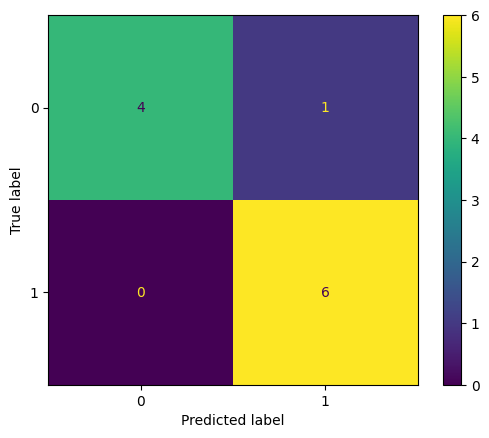

In [44]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [46]:
# put your answer here
accuracy_score(y_test, y_pred)

0.9090909090909091

Display the precision

In [47]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.8 1. ]


Display the recall

In [48]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.         0.85714286]


Display the f1-score

In [49]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.88888889 0.92307692]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [51]:
# put your answer here
knn.predict([[0, 0, 1, 40]])

array([0])